<a href="https://colab.research.google.com/github/laurasg03/Ejercicios_SyS3/blob/main/Copia_de__Sen%CC%83ales_Periodicas_Y_Aperiodicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Señales periódicas y aperiódicas

Una señal análoga $x(t)$ es periódica si y sólo si se cumple la siguiente relación:

$$
x(t) = x(t\pm T)
$$

Donde $T\in \mathbb{R}^+$ es único y el mínimo posible, conocido como el periódo fundamental de la función.

En caso de no cumplirse la relación, la señal se denomina aperiódica.


### Ejemplo 1

Determine si la señal $x(t) = e^{j~wt}$, con $w = \frac{2\pi}{T}$ es periódica.

$$
x(t+T) =  e^{j~w(t+T)}\\
x(t+T) =  e^{j~wt} \cdot  e^{j~wT}\\
x(t+T) =  e^{j~wt} \cdot \left(\cos(wT)+j~\sin(wT)\right)\\
x(t+T) =  e^{j~wt} \cdot \left(\cos\left(\frac{2\pi}{T}T\right)+j~\sin\left(\frac{2\pi}{T}T\right)\right)\\
x(t+T) =  e^{j~wt} \cdot (1+j~0)\\
x(t+T) = x(t)
$$

Por lo tanto, $x(t)$ es periódica con periodo $T = \frac{2\pi}{w}$.




In [ ]:
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

#figura interactiva para visualizar el concepto de periodicidad en el tiempo y en coordenadas polares
fig = plt.figure(figsize=(10, 10))
plt.close()
ax1 = fig.add_axes([0.1, 0.5, 0.4, 0.4], polar = True)
ax2 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax2.set_ylim([1, 0])
ax2.set_xlim([-1, 1])
ax2.grid()
ax2.set_ylabel('Tiempo')
ax2.set_xlabel('Eje Real')
ax3 = fig.add_axes([0.5, 0.5, 0.4, 0.4])
ax3.set_ylim([-1, 1])
ax3.set_xlim([0, 1])
ax3.grid()
ax3.set_xlabel('Tiempo')
ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Eje Imaginario')
ax4 = fig.add_axes([0.5, 0.1, 0.4, 0.4], projection='3d')
ax4.set_ylim([-1, 1])
ax4.set_xlim([-1, 1])
ax4.set_zlim([0, 1])
ax4.set_xlabel('Eje Real')
ax4.set_ylabel('Eje Imaginario')
ax4.set_zlabel('Tiempo')

po, = ax1.plot(0, 1, 'ko')
line = ax1.axvline(0, 0, 0.95)
p1, = ax1.plot([], [])
p2, = ax2.plot([], [])
p3, = ax3.plot([], [])
p4, = ax4.plot([], [], [])

#función para gráfico interactivo
def animate(i):
    Ts = 0.01
    t0 = i*Ts
    t = arange(0, t0+Ts, Ts)
    x = exp(1j*2*pi*t)
    po.set_xdata(2*pi*t0)
    line.set_xdata(2*pi*t0)
    p1.set_data(angle(x), abs(x))
    p2.set_data(real(x), t)
    p3.set_data(t, imag(x))
    p4.set_data_3d(real(x), imag(x), t)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=False)
rc('animation', html='jshtml')
anim

## Señal cuasiperiódica

Corresponde a una función con un periodo fundamental relativamente largo. Estas señales se componen por dos o más señales periódicas.

### Ejemplo 2

Determine el periodo fundamental de la señal $x(t) = \cos\left(\frac{t}{3}\right)+\cos\left(\frac{t}{4}\right)$.

$$
x(t+T) = \cos\left(\frac{t+T}{3}\right)+\cos\left(\frac{t+T}{4}\right)\\
x(t+T) = \cos\left(\frac{t}{3}\right)\cdot \cos\left(\frac{T}{3}\right)-\sin\left(\frac{t}{3}\right)\cdot \sin\left(\frac{T}{3}\right)+\cos\left(\frac{t}{4}\right)\cdot \cos\left(\frac{T}{4}\right)-\sin\left(\frac{t}{4}\right)\cdot \sin\left(\frac{T}{4}\right)
$$

La señal $x(t) = x(t+T)$ si:

$$
\left\{ \begin{array}{l}
             \frac{T}{3} = 2\pi k, ~~~ T = 6\pi k\\
             \\ \frac{T}{4} = 2\pi l, ~~~ T = 8\pi l \\
             \end{array}
   \right.
$$

Con $k, l \in \mathbb{Z}$.

Como el Mínimo Común Múltiplo (MCM) de 6 y 8 es 24, el periodo fundamental $T_0$ de la señal es entonces $24\pi$.

In [ ]:
from numpy import cos
t = arange(0, 72*pi, .1)
plt.figure(1, (25, 10))
x = cos(t/3) + cos(t/4)
plt.plot(t, x)
plt.grid()
plt.margins(x=0)
plt.xticks([0, 12*pi, 24*pi, 36*pi, 48*pi, 60*pi, 72*pi]
           , [0, '$12\pi$', '$24\pi$', '$36\pi$', '$48\pi$', '$60\pi$', '$72\pi$'])
plt.title('Gráfica señal $x(t)=cos(t/3)+cos(t/4)$', fontsize=15)
plt.show()



Por lo tanto, generalizando las expresiones se tiene:

$$
x(t) = \cos(w_1t)+\cos(w_2t)\\
x(t+T) = \cos(w_1t+w_1T)+\cos(w_2t+w_2T)\\
x(t+T) = \cos(w_1t)\cdot \cos(w_1T)-\sin(w_1t)\cdot \sin(w_1T)+\cos(w_2t)\cdot \cos(w_2T)-\sin(w_2t)\cdot \sin(w_2T)
$$

Donde la señal sera periódica si:

$$
\left\{ \begin{array}{l}
             w_1T = 2\pi k, ~~~ T = \frac{2\pi k}{w_1}\\
             \\ w_2T = 2\pi l, ~~~ T =\frac{2\pi l}{w_2} \\
             \end{array}
   \right.
$$

Con $k, l \in \mathbb{Z}$. Igualando terminos se tiene lo siguiente:

$$
\frac{w_1}{w_2} = \frac{k}{l}
$$

Lo que indica que la señal $x(t)$ es periódica si la relación $\frac{w_1}{w_2} \in \mathbb{Q}$.

Dado lo anterior, la señal $x(t) = \sin(\pi t)+\sin(\sqrt{2}t),$ donde $w_1 = \pi$ y $w_2 = \sqrt{2},$ no es periódica porque la relación $\frac{w_1}{w_2} = \frac{\pi}{\sqrt{2}} \notin \mathbb{Q}$.

In [ ]:
from numpy import sin, sqrt, cos
t = arange(0, 50, .01)
plt.figure(1, (25, 10))
x = sin(pi*t) + sin(sqrt(2)*t)
plt.plot(t, x)
plt.grid()
plt.margins(x=0)
plt.title('Gráfica señal $x(t) = sen(\pi t)+sen(\sqrt{2}t)$', fontsize=15)
plt.show()

## Periodicidad en señales discretas

Para el caso de señales discretas, la relación de periodicidad está dada por:

$$
x[n] = x[n+N], ~~~ N \in \mathbb{Z}
$$

Donde el mínimo valor de $N$ en el cual la relación se cumple se denomina periodo fundamental. En el caso de no cumplirse la relación, la señal discreta será aperiódica.

### Ejemplo 3

Determine si $x[n] = \cos[wn]$ es periodica.

$$
x[n] = x[n+N]\\
x[n] =\cos[w(n+N)]\\
x[n] = \cos[wn]\cdot \cos[wN]-\sin[wn]\cdot \sin[wN]
$$

La relación se cumple si $\cos[wN] = 1$ y $\sin[wN] = 0$, es decir:

$$
wN = 2\pi fN = 2\pi k, ~~~ k \in \mathbb{Z}
$$

Despejando $f$,

$$
f = \frac{k}{N}, ~~~ k, N \in \mathbb{Z}
$$

Por lo tanto, una señal sinusoidal discreta es periódica si y sólo si su frecuencia $f$ es un número racional.

$$
f \in \mathbb{Q}
$$

La señal $\cos[\frac{\pi}{3}n]$ es periódica debido a que su frecuencia $f$ es igual a $\frac{1}{6} \in \mathbb{Q}$.

In [ ]:
n = arange(0, 25)
plt.figure(1, (25, 10))
x = cos(n*pi/6)
plt.stem(n, x)
plt.grid()
plt.margins(x=.01)
plt.title('Gráfica señal $x[n] = cos[n\pi/3]$', fontsize=15)
plt.xticks([0, 6, 12, 18, 24], [0, '$N$ = 6 muestras', '$2N$', '$3N$', '$4N$'])
plt.show()

### Ejercicio

El siguiente bloque de código permite graficar las primeras 50 muestras de la señal $x[n] = cos[2\pi fn]$ para diferentes valores de $f$.

Saque sus propias conclusiones de cómo afecta el valor de la frecuencia el periodo de la señal discreta.

In [ ]:
import ipywidgets
def senial(f):

  n = arange(0, 50)
  plt.figure(1, (25, 10))
  x = cos(2*pi*f*n)
  plt.stem(n, x, use_line_collection=True)
  plt.grid()
  plt.margins(x=.01)
  plt.title('Gráfica de la señal $x[n] = cos(2\pi \cdot {} \cdot n)$'.format(f), fontsize=15)
  plt.xlabel('Muestras')
  plt.show()
display(ipywidgets.interactive(senial, f=ipywidgets.FloatText(value=0, step=.1, description='Valor de f:')))

Respuesta: podemos notar que cuando la frecuencia se acerca mucho a un número entero, ya sea ligeramente por encima o por debajo de ese número, es más fácil ver claramente la forma de la señal del coseno. Esto ocurre, por ejemplo, cuando la frecuencia se aproxima a valores como 0.1 o 0.2,o  0.8 o 0.9. Esto siempre se cumple de acuerdo con el teorema de Nyquist. Sin embargo, cuando la frecuencia llega a un número entero o a un número entero más 1/2, la señal se distorsiona.

# Ejemplo

- Determine si la siguiente señal es cuasiperiódica. En caso de que sea cuasiperiódica, gráfique la señal en el intervalo $t\in[-2T,2T]$.

$$x(t)=3\sin(4t) -2\cos(50t) + 2 \cos(10t)$$

$$\omega_1 = 4 = \frac{2\pi}{T_1} \to T_1 = \frac{2\pi}{4} = \frac{\pi}{2}$$

$$\omega_2 = 50 = \frac{2\pi}{T_2} \to T_2 = \frac{2\pi}{50} = \frac{\pi}{25}$$

$$\omega_3 = 10 = \frac{2\pi}{T_3} \to T_3 = \frac{2\pi}{10} = \frac{\pi}{5}$$

$$
\left\{ \begin{array}{l}
             \omega_1T = 2\pi k  \\
             \omega_2T = = 2\pi l\\
             \omega_3T = = 2\pi r
             \end{array}
   \right.
$$
donde $k,l,r\in\mathbb{Z}.$

Teniendo en cuenta que $\omega_1 T = \frac{2\pi}{T_1}T$

$$T = kT_1 = lT_2 = r T_3$$

$$T = k \frac{\pi}{2} = l \frac{\pi}{25} = r \frac{\pi}{5}$$

Para facilitar el análisis y la búsqueda del mínimo común múltiplo (MCM):

$$\frac{50}{\pi}T = k 25 = l 2 = r 10$$

Ahora, el MCM(25;2;10) = 50. Entonces:

$$k = 2; l = 25; r = 5.$$

Reemplazando:

$$\frac{50}{\pi}T = 2 (25) = 25 (2) = 5 (10) = 50$$

$$ T = \pi $$



In [ ]:
import numpy as np
# simulación

T1 = np.pi/2
T2 = np.pi/25
T3 = np.pi/5
T = np.pi #según lo cálculado

F1 = 1/T1
F2 = 1/T2
F3 = 1/T3

Fmax = np.max(np.array([F1,F2,F3]))
Fs = 10*Fmax
print('Fmax=',Fmax,'Fs=',Fs,'T=',T)

Fmax= 7.957747154594767 Fs= 79.57747154594767 T= 3.141592653589793


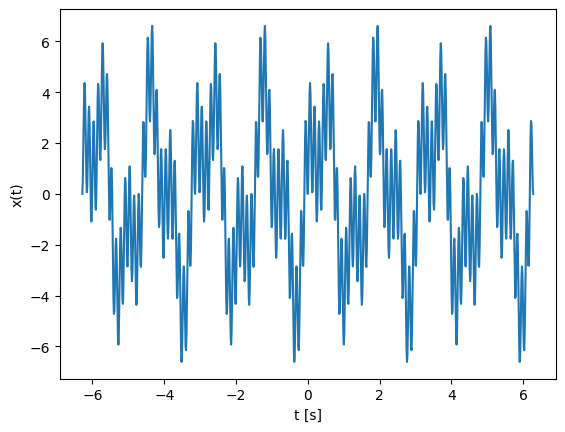

In [ ]:
ti = -2*T
tf = 2*T #intervalo de tiempo a graficar
tv = np.arange(ti,tf,1/Fs)
xv = 3*np.sin(4*tv) - 2*np.cos(50*tv) + 2*np.cos(10*tv)

plt.plot(tv,xv)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.show()

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.